In [1]:
import numpy as np 
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import time

In [2]:
start_time  = time.time()
#initialize vectors 
N = 1000
h = 0.05

In [3]:
##============intialize empty vectors==============##
x1 = np.zeros(N, dtype='float')
x2 = np.zeros(N, dtype='float')
dx1 = np.zeros(N, dtype='float')
dx2 = np.zeros(N, dtype='float')

y1 = np.zeros(N, dtype='float')
y2 = np.zeros(N, dtype='float')
dy1 = np.zeros(N, dtype='float')
dy2 = np.zeros(N, dtype='float')

In [4]:
##===============================To do list======================================##
#Choose a chaotic and regular orbit and:
#2.) Compute the Relative Lyanpunov indicator

#The chaotic orbit for K=1.2 is (0.01, -0.02)
#The regular orbit for K=1.2 is (0.2, 0.1)

##=======================The recipe for computing  the RLI=======================##
#1.) Choose two initial deviation vectors that are close together (dx = 10e-10)
#2.) Evolve the orbit (regular or chaotic)
#3.) Compute RLI = ||L(x + dx;t) - L(x; t)||

In [5]:
#intialize empty vectors for the computation of RLI
LCE = np.zeros(N, dtype='float')
RLI = np.zeros(N, dtype='float')
vec1 = np.zeros(N, dtype='float')
vec2 = np.zeros(N, dtype='float')

In [6]:
#function for normalizing deviation vectors
def alpha(dx, dy):
    return np.linalg.norm([dx, dy])

In [13]:
i = 0
#for idx in range(len(x1_vals)):
#intial conditions 
x1[0] =0.3#0.01
x2[0] = 0#0.01
dx1[0] = 1
dx2[0] = 1

y1[0] =x1[0] + 10e-7#0.01
y2[0] = x2[0] + 10e-7#0.01
dy1[0] = 1+1e-7
dy2[0] = 1+1e-7
#renormalize the initial deviation vectors
dx1[0] = dx1[0]/alpha(dx1[0], dx2[0])
dx2[0] = dx2[0]/alpha(dx1[0], dx2[0])
dy1[0] = dy1[0]/alpha(dy1[0], dy2[0])
dy2[0] = dy2[0]/alpha(dy1[0], dy2[0])
K =0.5#0.971635 #0.8
for i in range(N-1):
    x1[i+1] = (x1[i] + x2[i] + (K)*np.sin(x1[i]))%2*np.pi
    x2[i+1] = (x2[i] + (K)*np.sin(x1[i]))%2*np.pi
    
    #handle the variational equations
    dx1[i+1] = ((1 + K*np.cos(x1[i+1]))*dx1[i] + dx2[i])%2*np.pi
    dx2[i+1] = (K*np.cos(x1[i+1])*dx1[i] + dx2[i])%2*np.pi
    
    #w = [dx1, dx2]
    #computations for the second variable y
    
    y1[i+1] = (y1[i] + y2[i] + (K)*np.sin(y1[i]))%2*np.pi
    y2[i+1] = (y2[i] + (K)*np.sin(y1[i]))%2*np.pi
    
    #handle the variational equations
    dy1[i+1] = ((1 + K*np.cos(y1[i+1]))*dy1[i] + dy2[i])%2*np.pi
    dy2[i+1] = (K*np.cos(y1[i+1])*dy1[i] + dy2[i])%2*np.pi
    #w_dw = [dy1 ,dy2]
    #handle the computations of the RLI
    for idx in range(1, i):
        if i ==0:
            vec1[i] = np.log(alpha(dx1[idx], dx2[idx]))
            vec2[i] = np.log(alpha(dy1[idx], dy2[idx]))
            RLI[i] = (1/h)*(np.sum(np.linalg.norm([vec2[idx] - vec1[idx]])))
        else:
            vec1[i] = np.log(alpha(dx1[idx], dx2[idx]))
            vec2[i] = np.log(alpha(dy1[idx], dy2[idx]))
        RLI[i] = (1/i*h)*np.sum(np.linalg.norm([vec2[idx] - vec1[idx]]))
    #renormalize deviation vectors
    dx1[i+1] = dx1[i+1]/alpha(dx1[i+1], dx2[i+1])
    dx2[i+1] = dx2[i+1]/alpha(dx1[i+1], dx2[i+1])
    dy1[i+1] = dy1[i+1]/alpha(dy1[i+1], dy2[i+1])
    dy2[i+1] = dy2[i+1]/alpha(dy1[i+1], dy2[i+1])

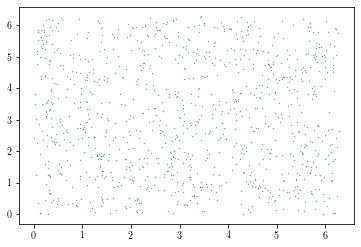

In [14]:
plt.scatter(x1, x2, s=0.1)

Text(0, 0.5, '$\\log_{10}RLI$')

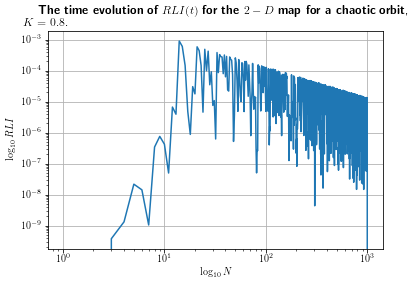

In [15]:
plt.grid()
plt.loglog(np.linspace(0, N, N),RLI)
#plt.plot(np.log10(np.linspace(0, N, N)), RLI)
plt.title(r'\textbf{The time evolution of $RLI(t)$ for the $2-D$ map for a chaotic orbit},\\$K = 0.8$.')
plt.xlabel(r'$\log_{10}N$')
plt.ylabel(r'$\log_{10}RLI$')


In [10]:
end_time = time.time() - start_time 
end_time/60

0.47238386869430543